In [43]:
from tf_pwa.config_loader import ConfigLoader
from tf_pwa.amp.core import Particle
import numpy as np
import tensorflow as tf
import json
import matplotlib.pyplot as plt

In [134]:
# Loading config files
config = ConfigLoader("config_a.yml")
config.set_params("final_params.json")

# Sampling four-vectors
p4 = config.generate_phsp_p(100000) # <-- number of sampled four-vectors
data = config.data.cal_angle(p4)

# Creating and model
amp_model = config.get_amplitude()
dg = amp_model.decay_group

/home/akazatsky/Desktop/CompProject/New/tf-pwa/tf_pwa/amp/core.py:138: UserWarning: No model named C(BWR_LS) found, use default instead.
  warnings.warn(
/home/akazatsky/Desktop/CompProject/New/tf-pwa/tf_pwa/amp/core.py:138: UserWarning: No model named C(BWR) found, use default instead.
  warnings.warn(
/home/akazatsky/Desktop/CompProject/New/tf-pwa/tf_pwa/amp/core.py:138: UserWarning: No model named C(New) found, use default instead.
  warnings.warn(
/home/akazatsky/Desktop/CompProject/New/tf-pwa/tf_pwa/amp/core.py:138: UserWarning: No model named C(one) found, use default instead.
  warnings.warn(
/home/akazatsky/Desktop/CompProject/New/tf-pwa/tf_pwa/amp/core.py:138: UserWarning: No model named C2(BWR) found, use default instead.
  warnings.warn(
/home/akazatsky/Desktop/CompProject/New/tf-pwa/tf_pwa/config_loader/config_loader.py:1035: UserWarning: Neglect ['X(3872)_mass', 'X(3872)_width', 'chi(c2)(3930)_mass', 'chi(c2)(3930)_width', 'Psi(4040)_mass', 'Psi(4040)_width', 'X0(2900)_mas

In [153]:
# Which resonances
count = 0
for i in range(len(dg.chains)):
    print(count, ':', dg.chains[i][0])
    count += 1

0 : Bp->X(3872)+K
1 : Bp->X(3915)(0-)+K
2 : Bp->chi(c2)(3930)+K
3 : Bp->X(3940)(1+)+K
4 : Bp->X(3993)+K
5 : Bp->Psi(4040)+K
6 : Bp->X(4300)+K
7 : Bp->NR(0-)SPp+K
8 : Bp->NR(1+)PSp+K
9 : Bp->NR(0-)SPm+K
10 : Bp->NR(1-)PPm+K
11 : Bp->X0(2900)+Dst
12 : Bp->X1(2900)+Dst


In [180]:
# Included resonance number(s)
R = [3] # [0]: X(3872), [1]: X(3915), [2]: chi(c2)(3930), ..., [0,1]: X(3872) and X(3915), ...

# Modifying model
dg.set_used_chains(R)

# Executing amplitude calculation
amps = dg.get_amp(data).numpy()

# Which decays
for i in R:
    print(dg[i])
print()

# Which end products
print(p4.keys())

[Bp->X(3940)(1+)+K, X(3940)(1+)->Dst+D, Dst->D0+pi]

dict_keys([D, D0, K, pi])


In [181]:
# Dalitz plot
def inv_mass_squared(p1, p2):
    E = p1[:, 0] + p2[:, 0]
    px = p1[:, 1] + p2[:, 1] 
    py = p1[:, 2] + p2[:, 2]
    pz = p1[:, 3] + p2[:, 3]
    return E**2 - (px**2 + py**2 + pz**2)

p4_str = {str(k): v for k, v in p4.items()}


I = np.abs(amps)**2
I = I.flatten()

p_D, p_D0, p_K, p_pi = p4_str['D'], p4_str['D0'], p4_str['K'], p4_str['pi']

p_Dst = p_D0 + p_pi

m2_DstD = inv_mass_squared(p_Dst, p_D)
m2_DstK= inv_mass_squared(p_Dst, p_K)
m2_DK = inv_mass_squared(p_D, p_K)

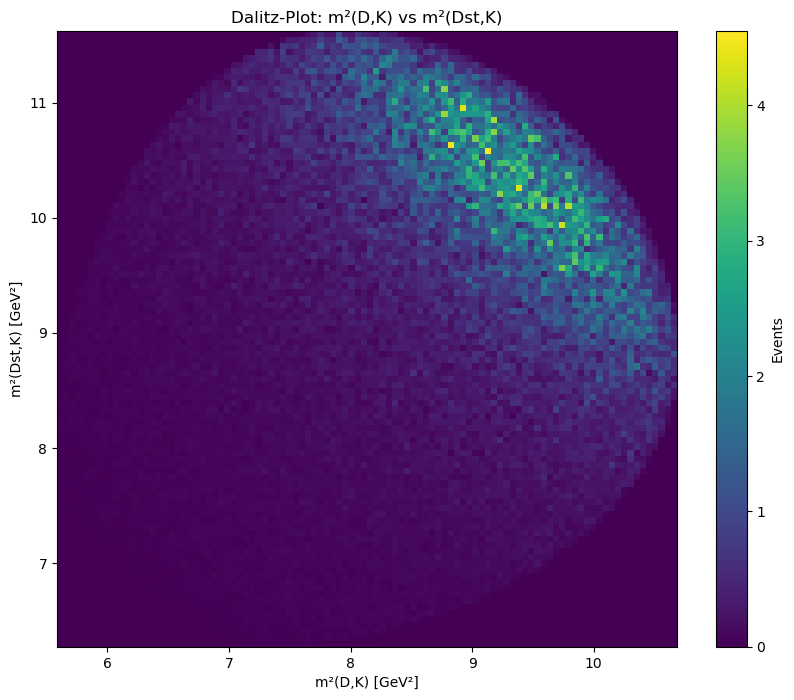

In [185]:
plt.figure(figsize=(10, 8))
plt.hist2d(m2_DK, m2_DstK, bins=100, weights=I, cmap='viridis')
plt.colorbar(label='Events')
plt.xlabel('m²(D,K) [GeV²]')
plt.ylabel('m²(Dst,K) [GeV²]')
plt.title('Dalitz-Plot: m²(D,K) vs m²(Dst,K)')
plt.show()

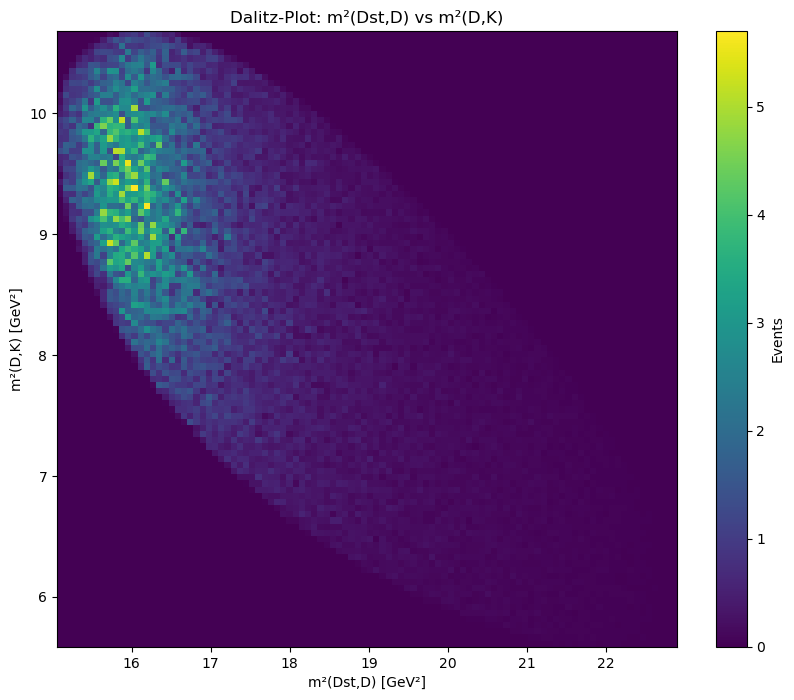

In [183]:
plt.figure(figsize=(10, 8))
plt.hist2d(m2_DstD, m2_DK, bins=100, weights=I, cmap='viridis')
plt.colorbar(label='Events')
plt.xlabel('m²(Dst,D) [GeV²]')
plt.ylabel('m²(D,K) [GeV²]')
plt.title('Dalitz-Plot: m²(Dst,D) vs m²(D,K)')
plt.show()